<a href="https://colab.research.google.com/github/richeym-umich/UsingTextAsDataWorkshop/blob/main/UNData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pandas-read-xml
import pandas_read_xml as pdx
from pandas_read_xml import flatten, fully_flatten, auto_separate_tables
import os
from zipfile import ZipFile
import pandas as pd
!pip3 install contractions

     |████████████████████████████████| 143kB 6.6MB/s 
     |████████████████████████████████| 348kB 17.7MB/s 
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.6 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


     |████████████████████████████████| 286kB 10.7MB/s 
     |████████████████████████████████| 327kB 36.5MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85402 sha256=949ec659ce8888a783fd99b01f0e07280e7a9167fa63e76143b6beac69064600
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [ ]:
file_name = 'pc_iii.zip'
with ZipFile(file_name, 'r') as zipping:
  zipping.extractall()
  print('unzip done')

unzip done


In [ ]:
directory = 'pc_iii'
paragraphs = []
for filename in os.listdir(directory):
  xmlFilename = os.path.join(directory, filename)
  print(xmlFilename)
  if os.path.isdir(xmlFilename):
    continue
  df = pdx.read_xml(xmlFilename, ['TEI.2', 'text', 'body'], encoding='utf8')
  df = fully_flatten(df, ['p|@id'])
  df = df.drop(['p|@id', 'p|s|@id', 'p|s|@lang'], axis=1)
  df = df.rename(columns={'p|s':'text'})
  paragraph = ''
  for i in range(0, len(df)):
    sentence = df.loc[i].values[0]
    paragraph += sentence
    paragraph += ' '
  paragraphs.append([filename, paragraph])
paragraphDF = pd.DataFrame.from_dict(paragraphs)
#rename columns
paragraphDF.columns=['filename', 'text']
paragraphDF.head()

pc_iii/sr_2.xml
pc_iii/wp_31.xml
pc_iii/wp_2.xml
pc_iii/12.xml
pc_iii/wp_41.xml
pc_iii/wp_39.xml
pc_iii/wp_43.xml
pc_iii/wp_30.xml
pc_iii/wp_19.xml
pc_iii/sr_17.xml
pc_iii/18.xml
pc_iii/wp_29.xml
pc_iii/wp_1.xml
pc_iii/9.xml
pc_iii/wp_25.xml
pc_iii/wp_44.xml
pc_iii/15.xml
pc_iii/wp_20.xml
pc_iii/14.xml
pc_iii/sr_5.xml
pc_iii/wp_32.xml
pc_iii/wp_45.xml
pc_iii/wp_18.xml
pc_iii/sr_3.xml
pc_iii/17.xml
pc_iii/wp_6.xml
pc_iii/wp_24.xml
pc_iii/19.xml
pc_iii/wp_33.xml
pc_iii/wp_3.xml
pc_iii/wp_15.xml
pc_iii/wp_8.xml
pc_iii/4.xml
pc_iii/wp_42.xml
pc_iii/wp_22.xml
pc_iii/wp_26.xml
pc_iii/wp_35.xml
pc_iii/wp_14.xml
pc_iii/wp_13.xml
pc_iii/wp_23.xml
pc_iii/10.xml
pc_iii/wp_28.xml
pc_iii/wp_37.xml
pc_iii/wp_27.xml
pc_iii/6.xml
pc_iii/wp_5.xml
pc_iii/wp_11.xml
pc_iii/wp_21.xml
pc_iii/16.xml
pc_iii/sr_6.xml
pc_iii/11.xml
pc_iii/5.xml
pc_iii/wp_34.xml
pc_iii/wp_38.xml
pc_iii/2.xml
pc_iii/wp_7.xml
pc_iii/8.xml
pc_iii/wp_40.xml
pc_iii/21.xml
pc_iii/wp_12.xml
pc_iii/wp_10.xml
pc_iii/wp_46.xml
pc_iii/7.xm

,filename,text
0,sr_2.xml,1. Mr. Motta Pinto Coelho (Brazil) said that t...
1,wp_31.xml,1. Nuclear disarmament forms one of the fundam...
2,wp_2.xml,Non-Proliferation of Nuclear Weapons reaffirms...
3,12.xml,1. Article VII of the Treaty on the Non-Prolif...
4,wp_41.xml,Nuclear disarmament and non-proliferation and ...


In [ ]:
#Do processing on the text
import string
import contractions
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
nltk.download('wordnet')

def get_key_words(comment):
    words = TweetTokenizer().tokenize(comment)
    words = [w for w in words if len(w) > 3] #word length
    words = [w for w in words if w.lower() not in stopwords]
    words = [WordNetLemmatizer().lemmatize(w) for w in words]
    return words

paragraphDF['text'] = paragraphDF['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#Expand contractions?
paragraphDF['text'] = paragraphDF['text'].apply(lambda x: " ".join(contractions.fix(word) for word in x.split()))

#Remove all punctuation
paragraphDF['text'] = paragraphDF['text'].str.translate(str.maketrans('', '', string.punctuation))

#Remove stopwords
stopwords  = [w.lower() for w in list(stopwords.words('english'))]
paragraphDF['keywords'] = paragraphDF['text'].apply(get_key_words)

#Stemming
#st = PorterStemmer()
#paragraphDF['keywords'] = paragraphDF['keywords'].apply(lambda x: [st.stem(word) for word in x])
paragraphDF.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,filename,text,keywords
0,sr_2.xml,1 mr motta pinto coelho brazil said that the p...,"[motta, pinto, coelho, brazil, said, primary, ..."
1,wp_31.xml,1 nuclear disarmament forms one of the fundame...,"[nuclear, disarmament, form, fundamental, pill..."
2,wp_2.xml,nonproliferation of nuclear weapons reaffirms ...,"[nonproliferation, nuclear, weapon, reaffirms,..."
3,12.xml,1 article vii of the treaty on the nonprolifer...,"[article, treaty, nonproliferation, nuclear, w..."
4,wp_41.xml,nuclear disarmament and nonproliferation and t...,"[nuclear, disarmament, nonproliferation, peace..."


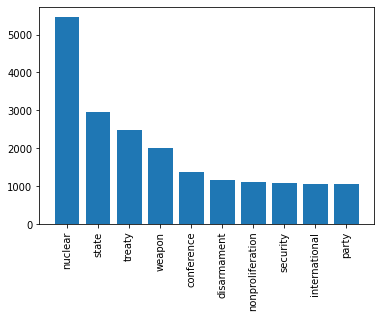

1-grams(word,count,perentage):
[('nuclear', 5464, '4.39E-2'), ('state', 2957, '2.38E-2'), ('treaty', 2489, '2.00E-2'), ('weapon', 2019, '1.62E-2'), ('conference', 1378, '1.11E-2'), ('disarmament', 1152, '9.26E-3'), ('nonproliferation', 1098, '8.82E-3'), ('security', 1086, '8.73E-3'), ('international', 1057, '8.49E-3'), ('party', 1050, '8.44E-3')]



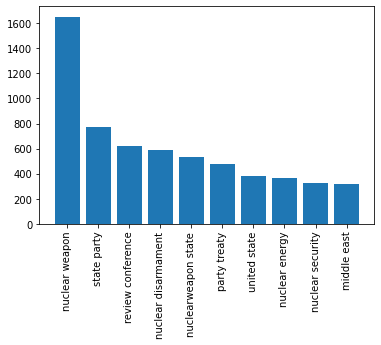

2-grams(word,count,perentage):
[('nuclear weapon', 1652, '1.33E-2'), ('state party', 774, '6.22E-3'), ('review conference', 618, '4.97E-3'), ('nuclear disarmament', 587, '4.72E-3'), ('nuclearweapon state', 535, '4.30E-3'), ('party treaty', 480, '3.86E-3'), ('united state', 379, '3.05E-3'), ('nuclear energy', 366, '2.94E-3'), ('nuclear security', 327, '2.63E-3'), ('middle east', 318, '2.56E-3')]



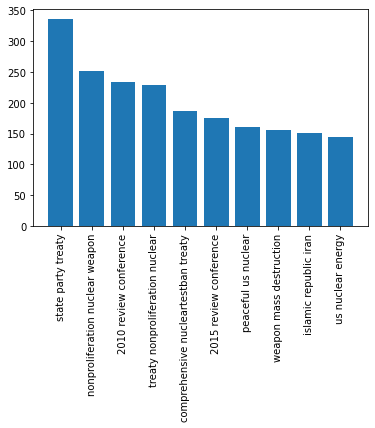

3-grams(word,count,perentage):
[('state party treaty', 336, '2.70E-3'), ('nonproliferation nuclear weapon', 252, '2.03E-3'), ('2010 review conference', 234, '1.88E-3'), ('treaty nonproliferation nuclear', 229, '1.84E-3'), ('comprehensive nucleartestban treaty', 186, '1.50E-3'), ('2015 review conference', 175, '1.41E-3'), ('peaceful us nuclear', 160, '1.29E-3'), ('weapon mass destruction', 156, '1.26E-3'), ('islamic republic iran', 151, '1.21E-3'), ('us nuclear energy', 145, '1.17E-3')]



In [ ]:
import collections
from collections import Counter
from decimal import Decimal
import matplotlib.pyplot as plt

N = 3 #N-grams
T = 10 #Max top words

def n_grams(kw, n):
    output = []
    for i in range(len(kw)-n+1):
        output.append(kw[i:i+n])
    return output

for n in range(1, N+1):
    key_words = paragraphDF["keywords"].tolist()
    key_words = [[' '.join(x) for x in n_grams(kw, n)] for kw in key_words]
    row_key_words = key_words
    key_words = [[each_word] for each_list in key_words for each_word in each_list]
    count = dict(Counter(map(tuple, key_words)))
    count = sorted(count.items(), key=lambda x: x[1], reverse=True)
    count = [(c[0][0],c[1]) for c in count]
    data = count[:T]
    x, y = zip(*data)

    most_important_words = list(x)
    allMatches = []
    for row in row_key_words:
      matches = []
      for word in most_important_words:
        if word in row:
          matches.append(word)
      allMatches.append(matches)
    columnName = str(n) + '-grams'
    paragraphDF[columnName] = allMatches

    plt.bar(x,y)
    plt.xticks(rotation = 90)
    plt.show()
    sumc = sum([c[1] for c in count])
    def get_sci_val(x):
        x = round(x/sumc, 6)
        x = "{:.2E}".format(Decimal(x))
        return x
    count = [(c[0],c[1],get_sci_val(c[1])) for c in count]
    print("{}-grams(word,count,perentage):\n{}\n".format(n,count[:T]))

In [ ]:
paragraphDF

,filename,text,keywords,1-grams,2-grams,3-grams
0,sr_2.xml,1 mr motta pinto coelho brazil said that the p...,"[motta, pinto, coelho, brazil, said, primary, ...","[nuclear, state, treaty, weapon, conference, d...","[nuclear weapon, state party, review conferenc...","[state party treaty, nonproliferation nuclear ..."
1,wp_31.xml,1 nuclear disarmament forms one of the fundame...,"[nuclear, disarmament, form, fundamental, pill...","[nuclear, state, treaty, weapon, conference, d...","[nuclear weapon, state party, review conferenc...","[state party treaty, nonproliferation nuclear ..."
2,wp_2.xml,nonproliferation of nuclear weapons reaffirms ...,"[nonproliferation, nuclear, weapon, reaffirms,...","[nuclear, state, treaty, weapon, conference, d...","[nuclear weapon, state party, review conferenc...","[state party treaty, nonproliferation nuclear ..."
3,12.xml,1 article vii of the treaty on the nonprolifer...,"[article, treaty, nonproliferation, nuclear, w...","[nuclear, state, treaty, weapon, conference, d...","[nuclear weapon, state party, review conferenc...","[state party treaty, nonproliferation nuclear ..."
4,wp_41.xml,nuclear disarmament and nonproliferation and t...,"[nuclear, disarmament, nonproliferation, peace...","[nuclear, state, treaty, weapon, disarmament, ...","[nuclear weapon, state party, nuclear disarmam...","[state party treaty, nonproliferation nuclear ..."
...,...,...,...,...,...,...
66,wp_16.xml,1 the group of nonaligned states parties to th...,"[group, nonaligned, state, party, treaty, nonp...","[nuclear, state, treaty, weapon, conference, d...","[nuclear weapon, state party, review conferenc...","[state party treaty, nonproliferation nuclear ..."
67,wp_17.xml,nonproliferation of nuclear weapons emphasizes...,"[nonproliferation, nuclear, weapon, emphasizes...","[nuclear, state, treaty, weapon, conference, d...","[nuclear weapon, state party, review conferenc...","[state party treaty, nonproliferation nuclear ..."
68,20.xml,2 the present report describes the activities ...,"[present, report, describes, activity, netherl...","[nuclear, state, treaty, weapon, conference, d...","[nuclear weapon, review conference, nuclear di...","[nonproliferation nuclear weapon, 2010 review ..."
69,3.xml,1 the present report is submitted pursuant to ...,"[present, report, submitted, pursuant, action,...","[nuclear, state, treaty, weapon, conference, d...","[nuclear weapon, state party, review conferenc...","[state party treaty, nonproliferation nuclear ..."
